# Why Deep Learning?

<div>
    <img src="art/cls_artificial_neural_network_7a4bfa38-6911-4ba0-8466-3658d4bf39ff.png" width=900 />
</div>

## Preamble

In [1]:
import pandas
import seaborn

In [2]:
import data_science_learning_paths
data_science_learning_paths.setup_plot_style(dark=True)
data_science_learning_paths.setup_slide_style(theme="night")

In [3]:
iris_url = "https://gist.githubusercontent.com/Thanatoz-1/9e7fdfb8189f0cdf5d73a494e4a6392a/raw/aaecbd14aeaa468cd749528f291aa8a30c2ea09e/iris_dataset.csv"

## Features make machine learning possible

Remember the **Iris** dataset? The measurements of the flower's petal and sepal dimensions are a good example of features that allow separation of observations into classes.

<img src="graphics/iris-data.png" width="700">

_Image credits: Principal Component Analysis by Sebastian Raschka_

In [4]:
iris_data = pandas.read_csv(iris_url)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


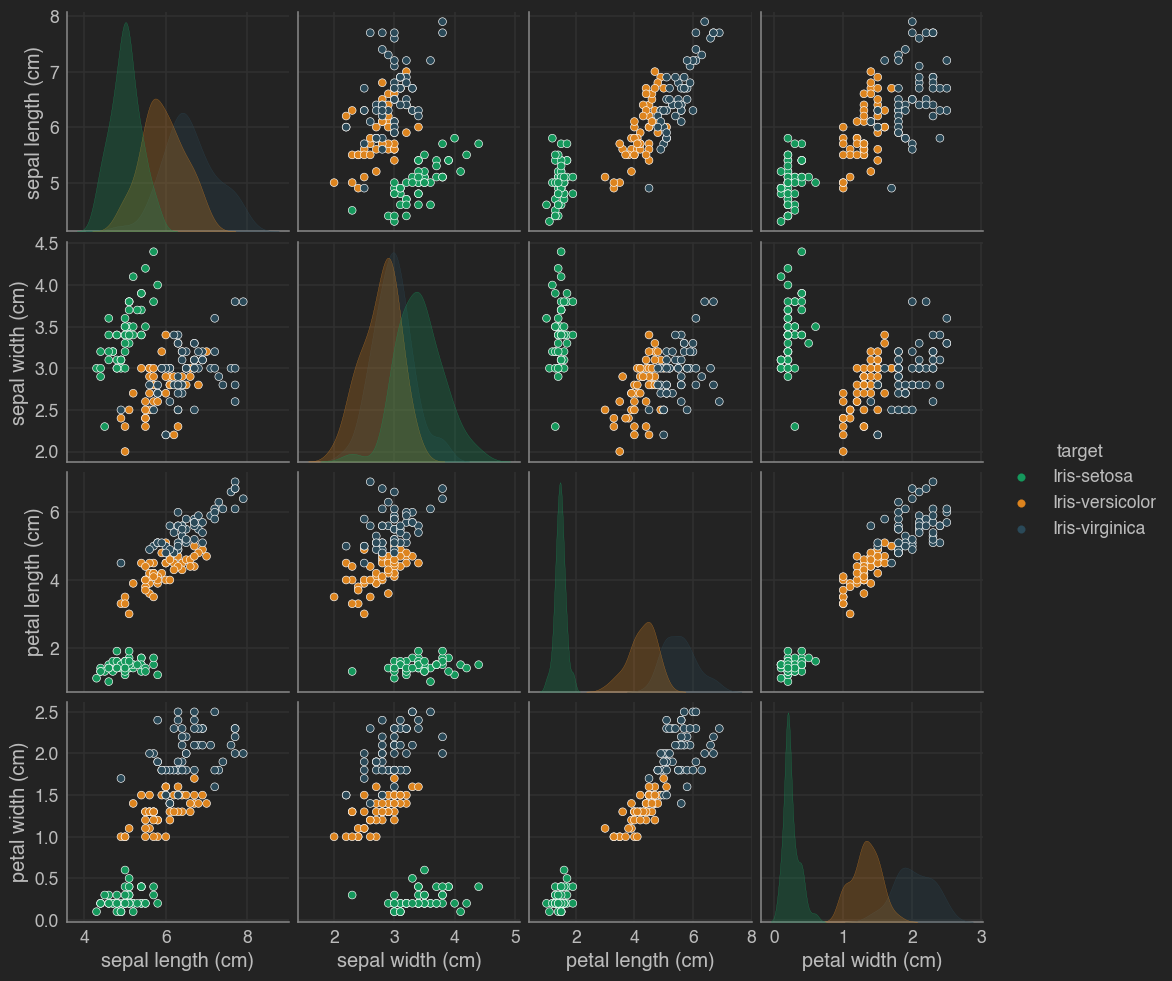

In [5]:
seaborn.pairplot(
    iris_data,
    vars=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"],
    hue="target"
)

## Feature Engineering


> Coming up with features is difficult, time-consuming, requires expert knowledge. "Applied machine learning" is basically feature engineering.

— Andrew Ng, ML researcher, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf)

Good features are not always so easily accessible - they may hide in the messy raw data. **Feature engineering is the process of mining the data for good features.** It requires an understanding the data to create features that make machine learning algorithms work.



### Example: Feature Engineering for Titanic Survival Model

In [6]:
data_path = "../notebooks/.assets/data/titanic/titanic.csv"

In [7]:
titanic_data = pandas.read_csv(data_path)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
!cat ../notebooks/.assets/data/titanic/titanic-documentation.txt

Data Dictionary

Variable	Definition	Key
survival 	Survival 	0 = No, 1 = Yes
pclass 	    Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	    Sex 	
Age 	    Age in years 	
sibsp 	    # of siblings / spouses aboard the Titanic 	
parch 	    # of parents / children aboard the Titanic 	
ticket 	    Ticket number 	
fare 	    Passenger fare 	
cabin 	    Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton


Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for t

#### Feature Idea: Cabins and Decks

This is an example of using some more domain knowledge to come up with a feature: We notice that we have a cabin number for some of the passengers on the list:

In [9]:
titanic_data["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Do you notice a pattern? The cabin number starts with a letter. What could that mean? Let's have a look at the blueprints:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Titanic_cutaway_diagram.png/515px-Titanic_cutaway_diagram.png) 
*cutaway diagram of the RNS Titanic - Source: Wikimedia Commons*

As we see, the letters refer to the ship's decks, from top to bottom. This gives us a promising hypothesis: Perhaps your chances of survival in the disaster depend on the placement of your cabin in the ship. We should test this hypothesis by deriving the deck as a new feature from the cabin number and providing it to our model.